<a href="https://colab.research.google.com/github/frcaulia/dicv_odd_2023/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Faricha Aulia ✨**

---

### **1. Make a Gamma Correction according to the following instructions**
This experiment will ask you to make a Gamma Correction. In this experiment, the Gamma value will be set by asking for input from the user . Below is the code to request value input from the user. Continue the code by creating an image with gamma correction according to the formula given

In [104]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Gamma Correction on Images
----------------------------------
Enter the Gamma Value: 3


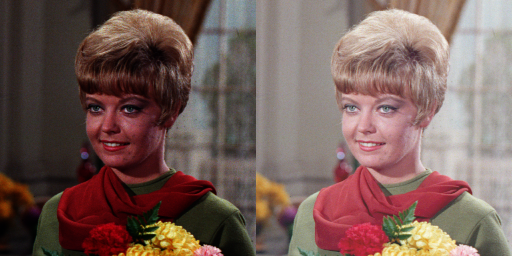

In [109]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np

print('Gamma Correction on Images')
print('----------------------------------')

try:
  gamma = int(input('Enter the Gamma Value: '))
except ValueError:
  print('Error, not a number')

female = cv.imread('/content/drive/MyDrive/Images/female.tiff')
gamma_female = np.zeros(female.shape, female.dtype)

for y in range(female.shape[0]):
  for x in range(female.shape[1]):
      gamma_female[y,x] = 255 * ((female[y,x] / 255) ** (1/gamma))

final_frame = cv.hconcat((female, gamma_female))
cv2_imshow(final_frame)

### **2. Create Image Depth Simulation**
This experiment is used as a simulation of the image quantization process. In image quantization, pixels can be represented by n-bit depth (default is 8-bit). In an 8-bit pixel, the possible colors are 256 colors, from 0 (0000 0000) to 255 (1111 1111). On a 7-bit pixel, the possible colors are 128 colors, from 0 (000 0000) to 127 (111 1111). The possible color is obtained from the power of 2 the number of bits. If it is 7 bits, then the number of colors
will be 2 7 = 128, etc. Since Visual Studio 2017 only works on 8 bits, this experiment only manipulates colors so that the number of colors matches their depth. For the 7-bit case, two 8-bit colors are represented by one 7-bit color. Examples of color pixels 0 and 1 at 8-bit, represented by color 0 at 7-bit. color pixels 2 and 3 at 8-bit, represented by color 1 at 7-bit, etc

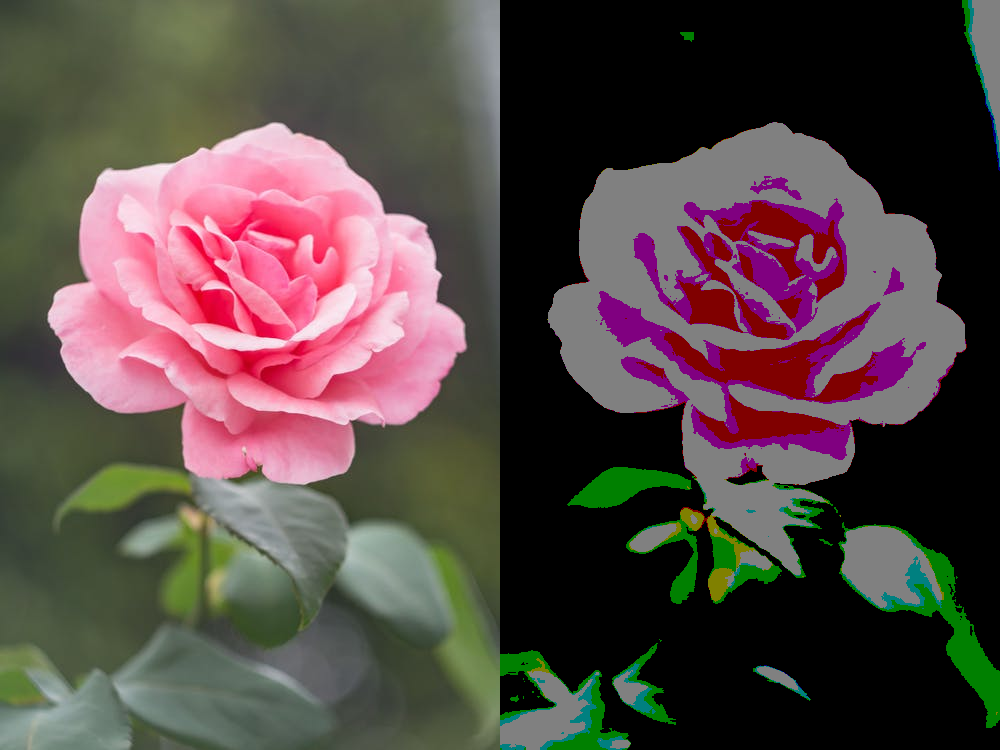

In [110]:
import cv2
from google.colab.patches import cv2_imshow

# Read original image
rose_img = cv2.imread('/content/drive/MyDrive/Images/rose_pink.png')

# Make sure the image was read successfully
if rose_img  is None:
    print("Error: Could not read image.")
else:
    # Quantize to 1-bits
    onebits_img = (rose_img  >> 7) << 7

    # Display original image and image with 1-bit bit depth
    combined_image = cv2.hconcat([rose_img , onebits_img])
    cv2_imshow(combined_image)

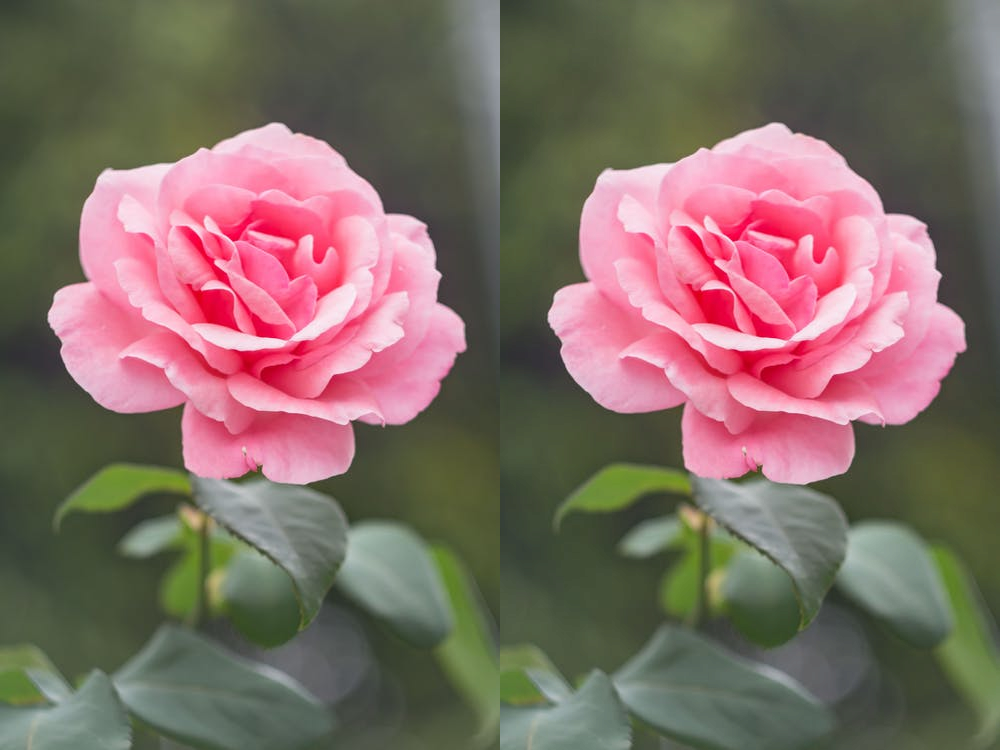

In [111]:
import cv2
from google.colab.patches import cv2_imshow

# Read original image
rose_image = cv2.imread('/content/drive/MyDrive/Images/rose_pink.png')

# Make sure the image was read successfully
if rose_image is None:
    print("Error: Could not read image.")
else:
    # Quantize to 7-bits
    sevenbits_img = (rose_image >> 1) << 1

    # Display original image and image with 7-bits bit depth
    combined_image = cv2.hconcat([rose_image, sevenbits_img])
    cv2_imshow(combined_image)

### **3. Create the Average Denoising module**
Create an average denoising module according to the formula given in the previous section.
*   Original images are provided at /images/galaxy.jpg
*   100 Images with Gaussian Noise are provided at /images/noises/*.jpg
*   You can use the following code to read all the images in one folder, use the glob module ( import glob ).

#### **Number of images in average = 5**

Number of images in average : 5 images


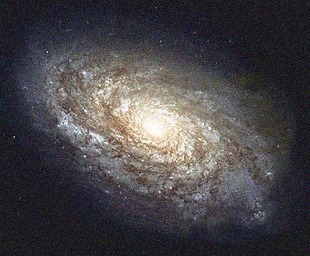

PSNR value: 19.52980279018794 dB


In [112]:
import cv2
import numpy as np
import glob
from google.colab.patches import cv2_imshow

# Load the original image
galaxy_ori = cv2.imread('/content/drive/MyDrive/Images/galaxy.jpg')

# Make sure the original image was read successfully
if galaxy_ori is None:
    print("Error: Could not read the original image.")
else:
    # Load the noisy images
    cv_img = []
    for img_path in glob.glob('/content/drive/MyDrive/Images/noises/*.jpg'):
        n = cv2.imread(img_path)
        cv_img.append(n)

    # Define the number of images in average
    num_images = 5

    # Compute the average image
    galaxy_avg = np.zeros_like(galaxy_ori, dtype=np.float32)
    for i in range(num_images):
        galaxy_avg += cv_img[i].astype(np.float32)
    galaxy_avg /= num_images

    # Convert the average image to uint8
    galaxy_avg = galaxy_avg.astype(np.uint8)

    # Compute the PSNR value
    psnr = cv2.PSNR(galaxy_ori, galaxy_avg)

    # Display the denoised image and PSNR value
    print(f'Number of images in average : {num_images} images')
    cv2_imshow(galaxy_avg)
    print(f'PSNR value: {psnr} dB')

#### **Number of images in average = 30**

Number of images in average : 30 images


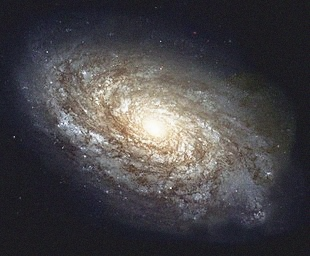

PSNR value: 19.875005724006833 dB


In [113]:
import cv2
import numpy as np
import glob
from google.colab.patches import cv2_imshow

# Load the original image
galaxy_ori = cv2.imread('/content/drive/MyDrive/Images/galaxy.jpg')

# Make sure the original image was read successfully
if galaxy_ori is None:
    print("Error: Could not read the original image.")
else:
    # Load the noisy images
    cv_img = []
    for img_path in glob.glob('/content/drive/MyDrive/Images/noises/*.jpg'):
        n = cv2.imread(img_path)
        cv_img.append(n)

    # Define the number of images in average
    num_images = 30

    # Compute the average image
    galaxy_avg = np.zeros_like(galaxy_ori, dtype=np.float32)
    for i in range(num_images):
        galaxy_avg += cv_img[i].astype(np.float32)
    galaxy_avg /= num_images

    # Convert the average image to uint8
    galaxy_avg = galaxy_avg.astype(np.uint8)

    # Compute the PSNR value
    psnr = cv2.PSNR(galaxy_ori, galaxy_avg)

    # Display the denoised image and PSNR value
    print(f'Number of images in average : {num_images} images')
    cv2_imshow(galaxy_avg)
    print(f'PSNR value: {psnr} dB')

#### **Number of images in average = 60**

Number of images in average : 60 images


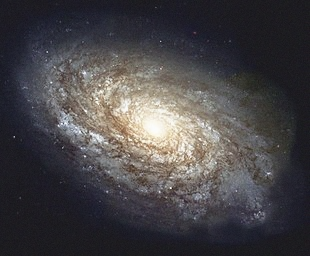

PSNR value: 19.909835721954828 dB


In [114]:
import cv2
import numpy as np
import glob
from google.colab.patches import cv2_imshow

# Load the original image
galaxy_ori = cv2.imread('/content/drive/MyDrive/Images/galaxy.jpg')

# Make sure the original image was read successfully
if galaxy_ori is None:
    print("Error: Could not read the original image.")
else:
    # Load the noisy images
    cv_img = []
    for img_path in glob.glob('/content/drive/MyDrive/Images/noises/*.jpg'):
        n = cv2.imread(img_path)
        cv_img.append(n)

    # Define the number of images in average
    num_images = 60

    # Compute the average image
    galaxy_avg = np.zeros_like(galaxy_ori, dtype=np.float32)
    for i in range(num_images):
        galaxy_avg += cv_img[i].astype(np.float32)
    galaxy_avg /= num_images

    # Convert the average image to uint8
    galaxy_avg = galaxy_avg.astype(np.uint8)

    # Compute the PSNR value
    psnr = cv2.PSNR(galaxy_ori, galaxy_avg)

    # Display the denoised image and PSNR value
    print(f'Number of images in average : {num_images} images')
    cv2_imshow(galaxy_avg)
    print(f'PSNR value: {psnr} dB')

#### **Number of images in average = 80**

Number of images in average : 80 images


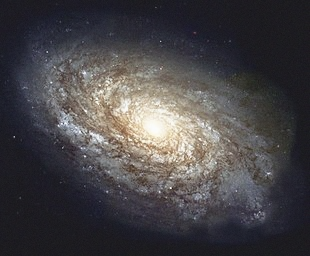

PSNR value: 19.917197250927426 dB


In [115]:
import cv2
import numpy as np
import glob
from google.colab.patches import cv2_imshow

# Load the original image
galaxy_ori = cv2.imread('/content/drive/MyDrive/Images/galaxy.jpg')

# Make sure the original image was read successfully
if galaxy_ori is None:
    print("Error: Could not read the original image.")
else:
    # Load the noisy images
    cv_img = []
    for img_path in glob.glob('/content/drive/MyDrive/Images/noises/*.jpg'):
        n = cv2.imread(img_path)
        cv_img.append(n)

    # Define the number of images in average
    num_images = 80

    # Compute the average image
    galaxy_avg = np.zeros_like(galaxy_ori, dtype=np.float32)
    for i in range(num_images):
        galaxy_avg += cv_img[i].astype(np.float32)
    galaxy_avg /= num_images

    # Convert the average image to uint8
    galaxy_avg = galaxy_avg.astype(np.uint8)

    # Compute the PSNR value
    psnr = cv2.PSNR(galaxy_ori, galaxy_avg)

    # Display the denoised image and PSNR value
    print(f'Number of images in average : {num_images} images')
    cv2_imshow(galaxy_avg)
    print(f'PSNR value: {psnr} dB')

#### **Number of images in average = 100**

Number of images in average : 100 images


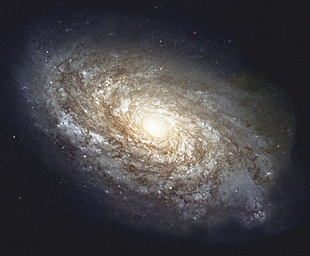

PSNR value: 19.92196095594035 dB


In [116]:
import cv2
import numpy as np
import glob
from google.colab.patches import cv2_imshow

# Load the original image
galaxy_ori = cv2.imread('/content/drive/MyDrive/Images/galaxy.jpg')

# Make sure the original image was read successfully
if galaxy_ori is None:
    print("Error: Could not read the original image.")
else:
    # Load the noisy images
    cv_img = []
    for img_path in glob.glob('/content/drive/MyDrive/Images/noises/*.jpg'):
        n = cv2.imread(img_path)
        cv_img.append(n)

    # Define the number of images in average
    num_images = 100

    # Compute the average image
    galaxy_avg = np.zeros_like(galaxy_ori, dtype=np.float32)
    for i in range(num_images):
        galaxy_avg += cv_img[i].astype(np.float32)
    galaxy_avg /= num_images

    # Convert the average image to uint8
    galaxy_avg = galaxy_avg.astype(np.uint8)

    # Compute the PSNR value
    psnr = cv2.PSNR(galaxy_ori, galaxy_avg)

    # Display the denoised image and PSNR value
    print(f'Number of images in average : {num_images} images')
    cv2_imshow(galaxy_avg)
    print(f'PSNR value: {psnr} dB')

#### **Conclusion:**





The data suggests that averaging a larger number of noisy images can improve denoising and result in higher PSNR values, but the rate of improvement diminishes as more images are included. The choice of the optimal number of images to average depends on the specific application and the trade-off between image quality and computational resources.
*   PSNR Improvement: Increasing the number of averaged images leads to higher PSNR values, indicating improved denoising and better image quality.
*   Diminishing Returns: The rate of PSNR improvement diminishes as more images are averaged, suggesting diminishing returns in noise reduction.
*   Optimal Number of Images: There appears to be an optimal point, around 60 images averaged, where the PSNR value reaches a relatively stable level, balancing noise reduction with computational efficiency.
*   Practical considerations : such as computation time and memory usage, should be taken into account when deciding on the number of images to average.

### **4. Create image masking for the following image. The left image is the original image ( images / teeth.jpg )**

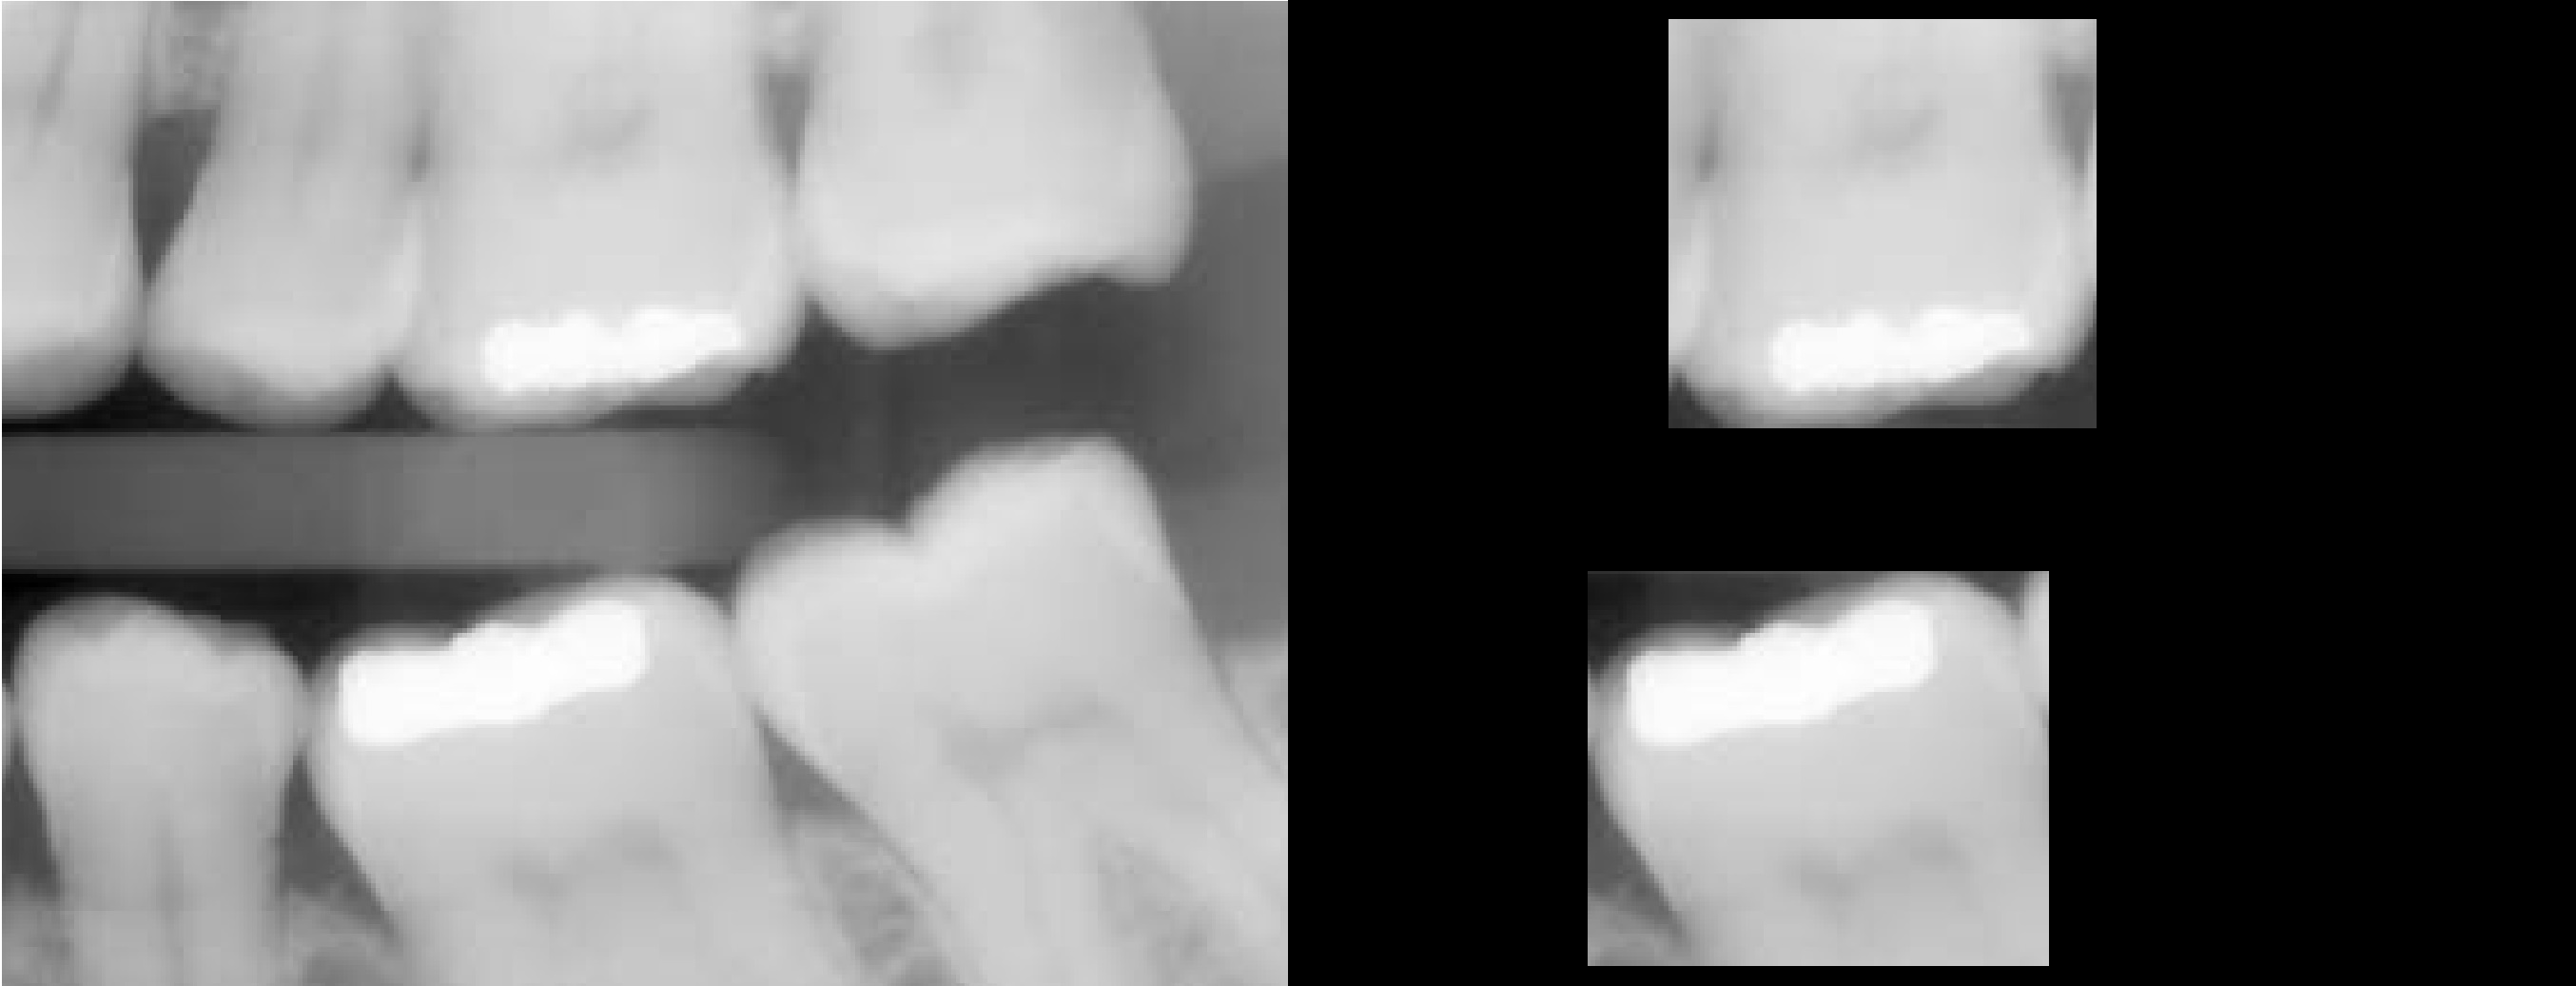

In [117]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the image
teeth_ori = cv2.imread('/content/drive/MyDrive/Images/teeth.jpg')

# Create a binary mask
mask = np.zeros_like(teeth_ori, dtype=np.uint8)
mask[20:450, 400:850] = 255
mask[600:1015, 315:800] = 255

# Apply the mask using the bitwise AND operator
masked_img = cv2.bitwise_and(teeth_ori, mask)

# Combine the original image and masked image
masking_combine = cv2.hconcat([teeth_ori, masked_img])

# Display image
cv2_imshow(masking_combine)
cv2.waitKey(0)
cv2.destroyAllWindows()

### **5. Do the experiment using other operators and show the results in this module**

#### **OR Operation**

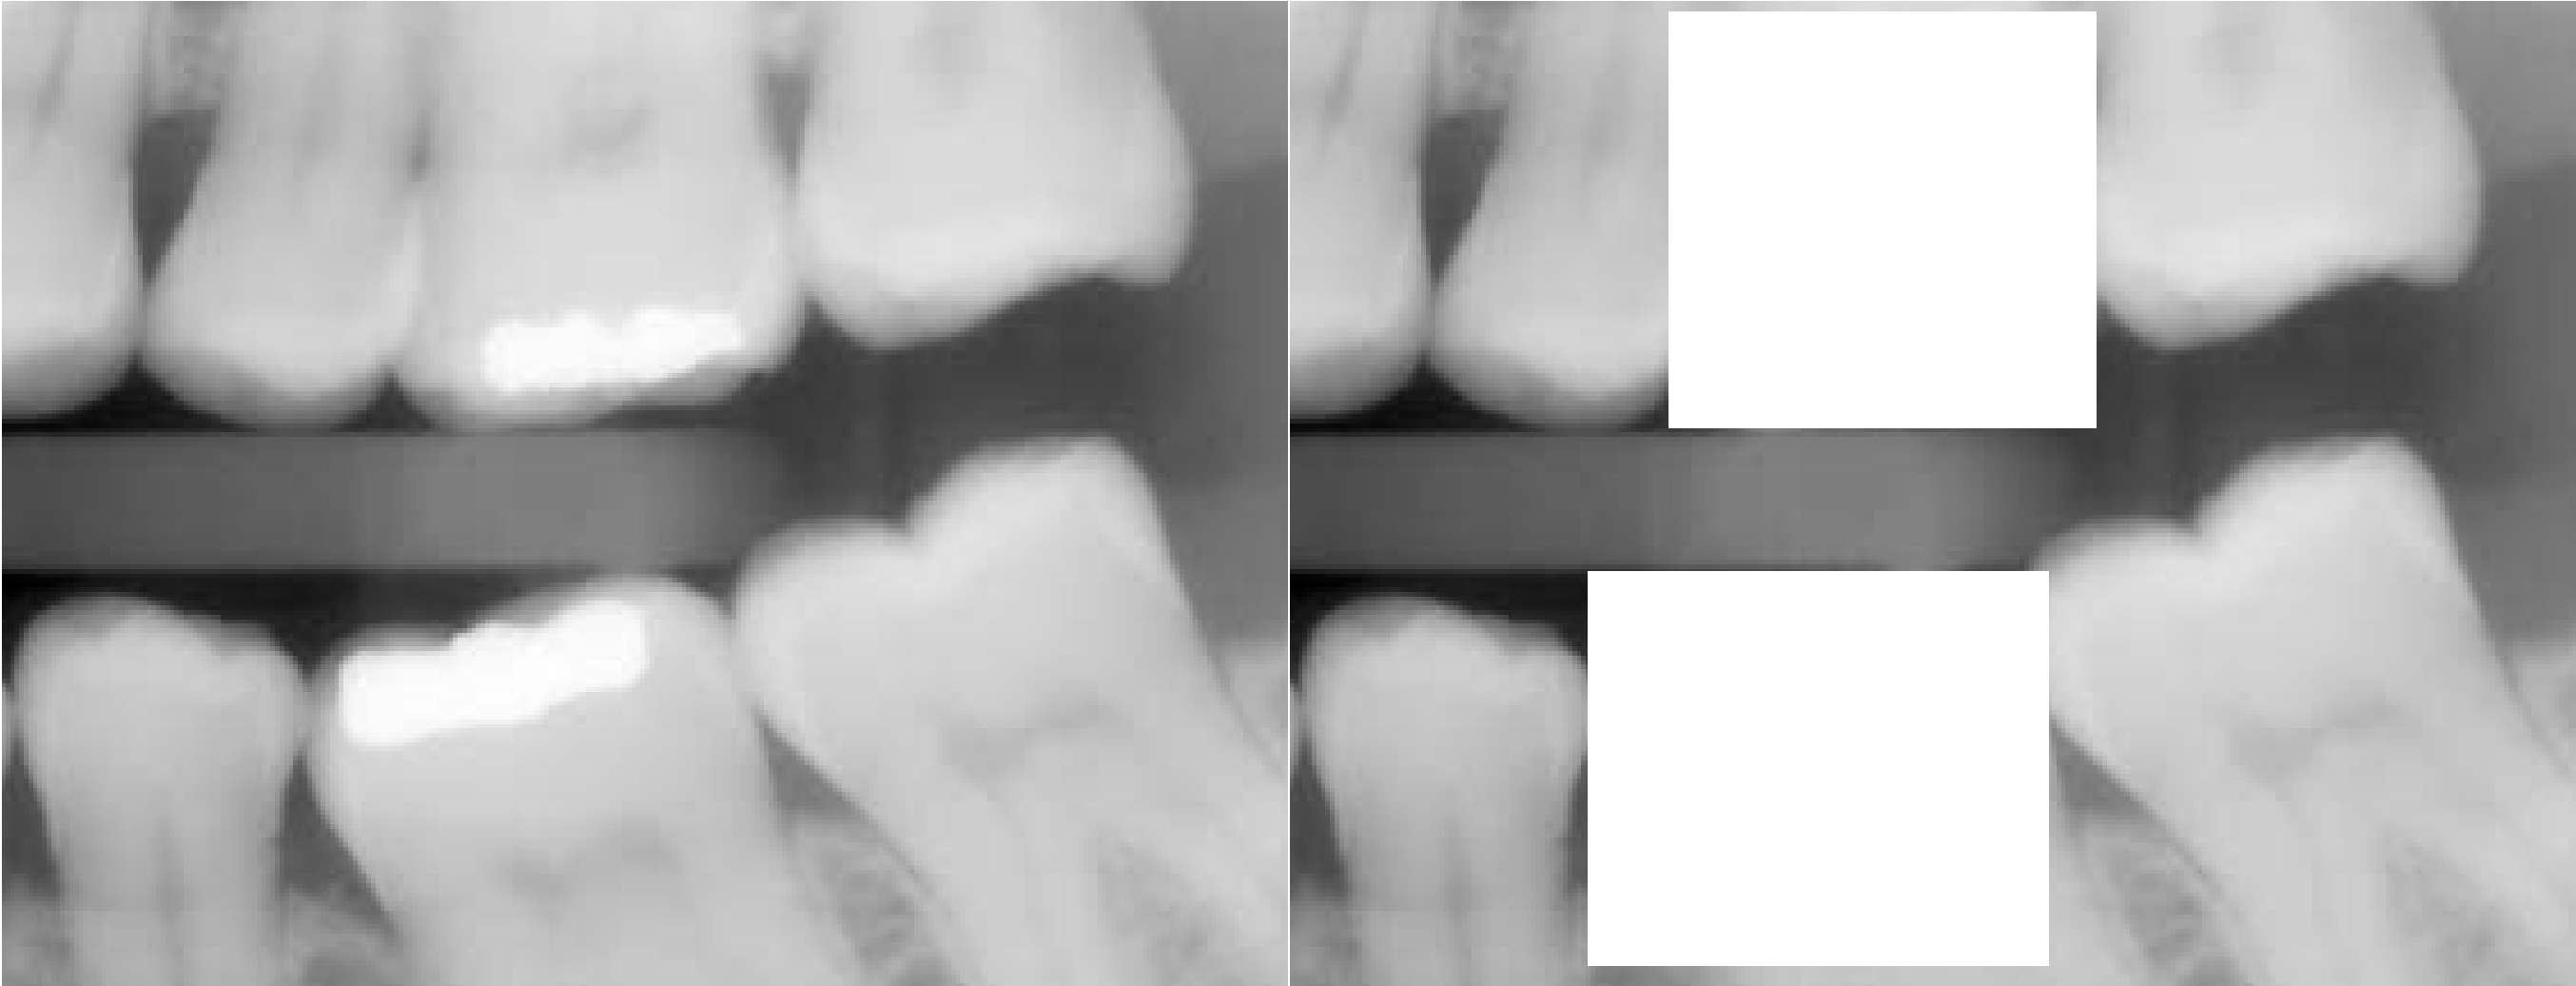

In [118]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the image
teeth_or = cv2.imread('/content/drive/MyDrive/Images/teeth.jpg')

# Create binary masks
mask1 = np.zeros_like(teeth_or, dtype=np.uint8)
mask1[12:450, 400:850] = 255
mask2 = np.zeros_like(teeth_or, dtype=np.uint8)
mask2[600:1015, 315:800] = 255

# Combine the masks using the bitwise OR operator
combine_or = cv2.bitwise_or(mask1, mask2)

# Apply the combined mask using the bitwise OR operator
result_or = cv2.bitwise_or(teeth_or, combine_or)

# Concatenate the original image and result image horizontally
or_image = cv2.hconcat([teeth_or, result_or])

# Display the concatenated image
cv2_imshow(or_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### **NOT Operation**

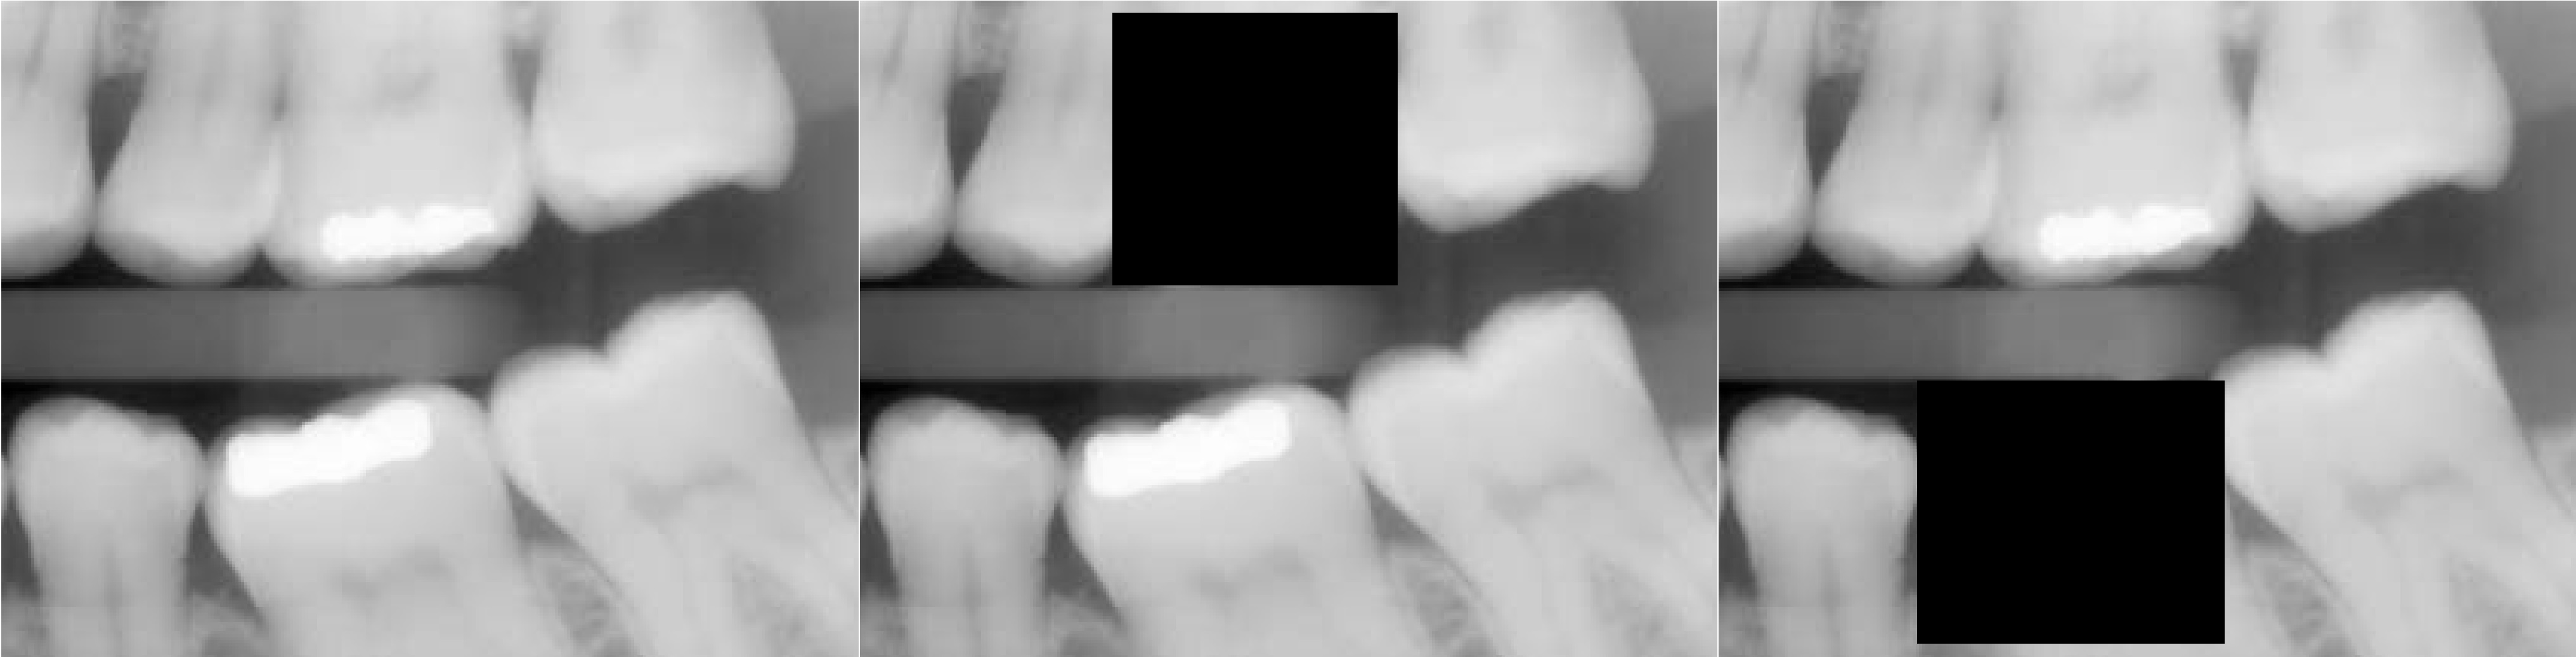

In [119]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the image
teeth_not = cv2.imread('/content/drive/MyDrive/Images/teeth.jpg')

# Create binary masks
mask1 = np.zeros_like(img, dtype=np.uint8)
mask1[20:450, 400:850] = 255
mask2 = np.zeros_like(img, dtype=np.uint8)
mask2[600:1015, 315:800] = 255

# Perform the NOT operation on the masks
not_mask1 = cv2.bitwise_not(mask1)
not_mask2 = cv2.bitwise_not(mask2)

# Apply the NOT masks to the original image using the bitwise AND operator
result_not1 = cv2.bitwise_and(teeth_not , not_mask1)
result_not2 = cv2.bitwise_and(teeth_not , not_mask2)

# Concatenate the original image and result images
not_image = cv2.hconcat([teeth_not , result_not1, result_not2])

# Display image
cv2_imshow(not_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### **NAND Operation**

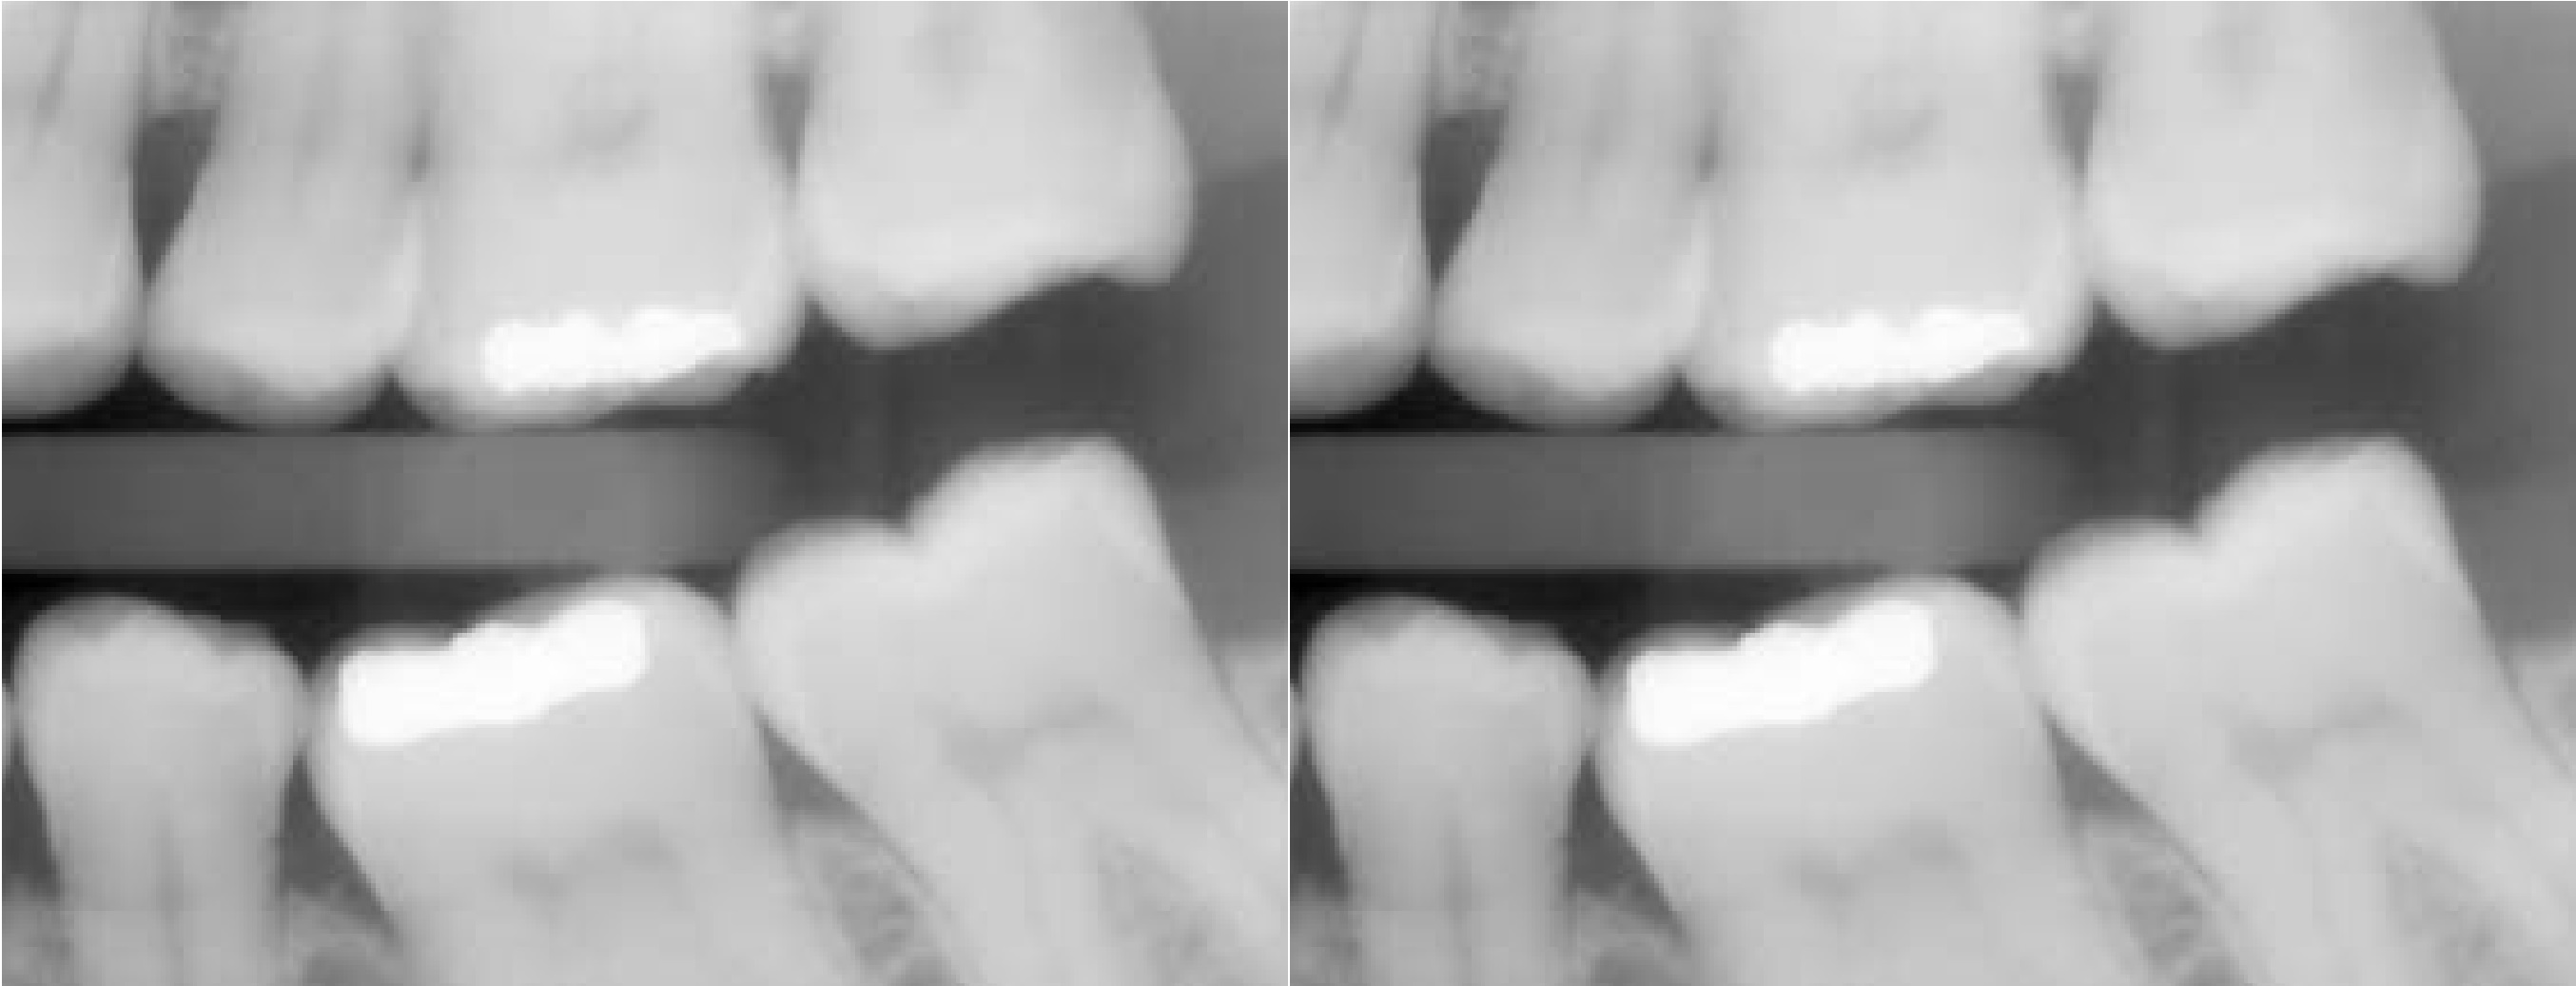

In [120]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the image
teeth_nand = cv2.imread('/content/drive/MyDrive/Images/teeth.jpg')

# Create binary masks
mask1 = np.zeros_like(teeth_nand, dtype=np.uint8)
mask1[10:450, 400:850] = 255
mask2 = np.zeros_like(teeth_nand, dtype=np.uint8)
mask2[600:1050, 315:800] = 255

# Perform the NAND operation on the masks
nand_mask = cv2.bitwise_not(cv2.bitwise_and(mask1, mask2))

# Apply the NAND mask to the original image using the bitwise AND operator
result_nand = cv2.bitwise_and(teeth_nand, nand_mask)

# Concatenate the original image and result image
nand_image = cv2.hconcat([teeth_nand, result_nand])

# Display image
cv2_imshow(nand_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### **XOR Operation**

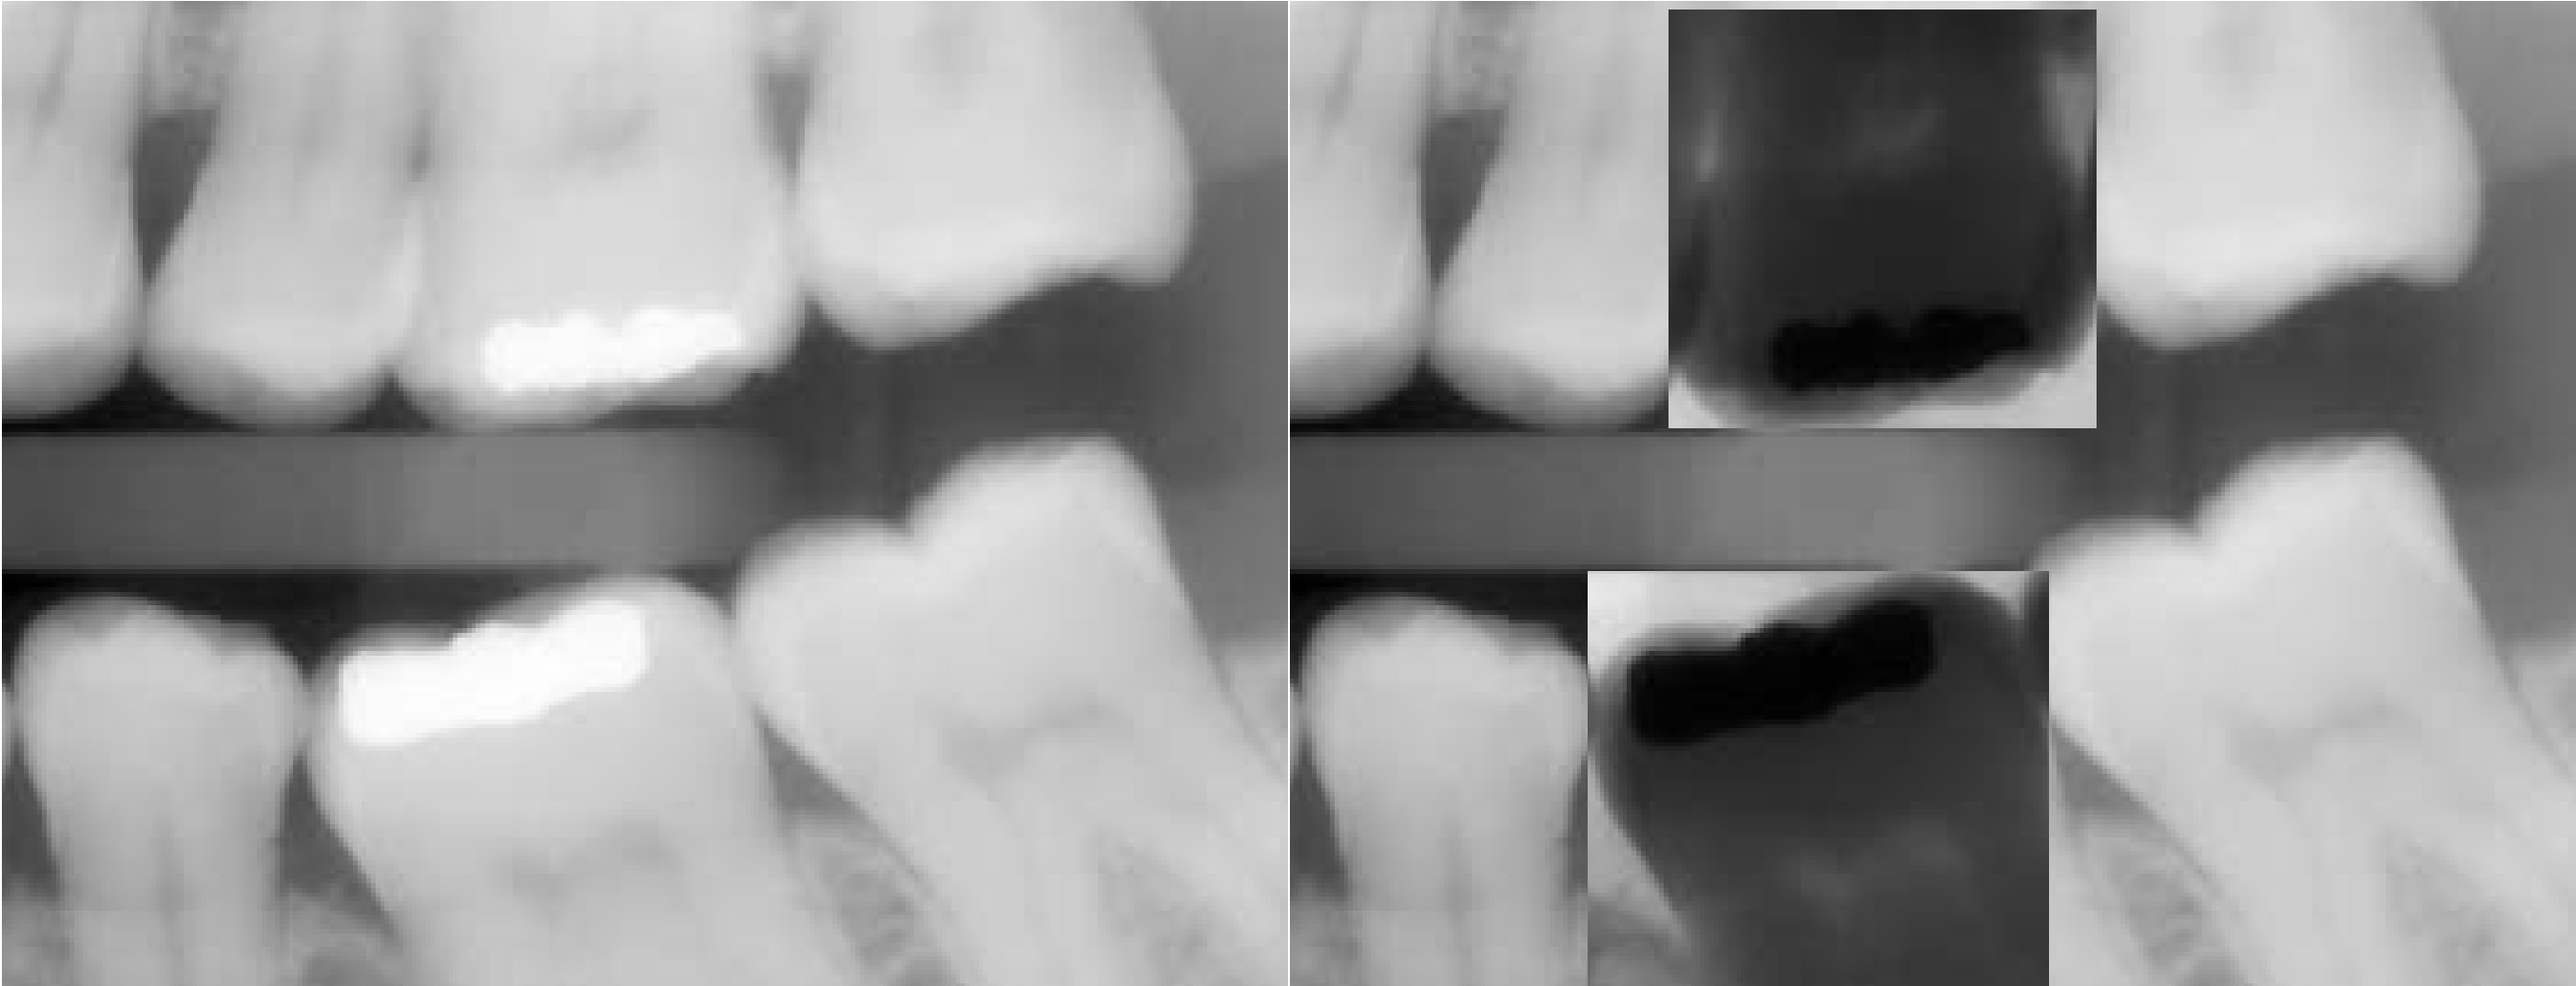

In [121]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the image
teeth_xor = cv2.imread('/content/drive/MyDrive/Images/teeth.jpg')

# Create binary masks
mask1 = np.zeros_like(teeth_xor, dtype=np.uint8)
mask1[10:450, 400:850] = 255
mask2 = np.zeros_like(teeth_xor, dtype=np.uint8)
mask2[600:1050, 315:800] = 255

# Perform the XOR operation on the masks
xor_mask = cv2.bitwise_xor(mask1, mask2)

# Apply the XOR mask to the original image using the bitwise XOR operator
result_xor = cv2.bitwise_xor(teeth_xor, xor_mask)

# Concatenate the original image and result image
xor_image = cv2.hconcat([teeth_xor, result_xor])

# Display image
cv2_imshow(xor_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### **Conclusion**

In image processing, these bitwise operations are valuable tools for creating and manipulating masks to isolate specific regions, emphasize features, or detect differences. The choice of which operation to use depends on the specific image processing task and the desired outcome. These operations provide flexibility in image analysis and allow for creative ways to extract information or modify images for various applications.

**OR Operation (Bitwise OR):**
* The OR operation combines two binary masks or regions, resulting in a new binary mask.
* It highlights areas where either of the original masks contains white pixels.
* OR operation is useful for combining regions of interest or specifying areas of importance in an image.

**NOT Operation (Bitwise NOT):**
* The NOT operation inverts the pixel values of a binary mask, turning black pixels into white and vice versa.
* It can be used to exclude specific regions of interest or create masks that focus on the complement of a region.
* NOT operation can be applied to enhance or suppress certain features in an image.

**NAND Operation (Bitwise NAND):**
* The NAND operation combines two binary masks, but it emphasizes the areas where both masks contain white pixels and turns them black.
* It effectively acts as a "negative AND" operation, highlighting regions where both masks do not overlap.
* NAND operation can be used to isolate regions that do not coincide in two masks.

**XOR Operation (Bitwise XOR):**
* The XOR operation combines two binary masks, highlighting areas where the two masks differ.
* It produces white pixels where one mask has a white pixel and the other has a black pixel.
* XOR operation is useful for finding differences or variations between two regions in an image.